In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests

In [2]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lats_lngs = zip(lats,lngs)

In [3]:
coordinates = list(lats_lngs)

In [4]:
# Create a list to append the cities to
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
print(len(cities))

619


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    'units':'Imperial',
    'appid':weather_api_key,
    'q':'san jose'
}

In [6]:
city_weather = requests.get(url,params)
city_weather

<Response [200]>

In [7]:
#params['q'] = 'Bston'
#city_weather = requests.get(url,params)
#city_weather

In [8]:
city_weather.json()

{'coord': {'lon': -121.895, 'lat': 37.3394},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 58.96,
  'feels_like': 57.09,
  'temp_min': 55.4,
  'temp_max': 62.01,
  'pressure': 1019,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 0},
 'clouds': {'all': 75},
 'dt': 1617648653,
 'sys': {'type': 1,
  'id': 5845,
  'country': 'US',
  'sunrise': 1617630388,
  'sunset': 1617676406},
 'timezone': -25200,
 'id': 5392171,
 'name': 'San Jose',
 'cod': 200}

In [9]:
boston_data = city_weather.json()

In [10]:
boston_country = boston_data['sys']['country']
date_time = boston_data['dt']
lat = boston_data['coord']['lat']
lng = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']
print(lat, lng, max_temp, humidity, clouds, wind)

37.3394 -121.895 62.01 54 75 5.75


In [11]:
from datetime import datetime
datetime.utcfromtimestamp(date_time).strftime('%Y-%m-%d %H:%M:%S')

'2021-04-05 18:50:53'

In [12]:
# empty listy to hold data for the cities
city_data = []

# begin statement
print("Beginning Data Retrieval     ")
print("-----------------------------")

# init counters
record_count = 1
set_count = 1
# Loop through cities
for i, city in enumerate(cities):
    
    # group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #set up parameter dictionary to create correct endpoint
    params['q'] = city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(url,params).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert datetime to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # skip if we get an error
    except:
        print("City not found.Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | minas
Processing Record 4 of Set 1 | dvinskoy
Processing Record 5 of Set 1 | port blair
Processing Record 6 of Set 1 | kazalinsk
City not found.Skipping...
Processing Record 7 of Set 1 | gaoua
Processing Record 8 of Set 1 | vavoua
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | chagoda
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | irituia
Processing Record 14 of Set 1 | betare oya
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | illoqqortoormiut
City not found.Skipping...
Processing Record 17 of Set 1 | sao joao da barra
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | tsihombe
City not found.Skipping...
Processing Record 21 of Set 1 | amot


Processing Record 36 of Set 4 | oriximina
Processing Record 37 of Set 4 | takoradi
Processing Record 38 of Set 4 | porto novo
Processing Record 39 of Set 4 | duz
City not found.Skipping...
Processing Record 40 of Set 4 | gat
Processing Record 41 of Set 4 | narsaq
Processing Record 42 of Set 4 | richards bay
Processing Record 43 of Set 4 | tuni
Processing Record 44 of Set 4 | praia da vitoria
Processing Record 45 of Set 4 | oum hadjer
Processing Record 46 of Set 4 | laguna
Processing Record 47 of Set 4 | parelhas
Processing Record 48 of Set 4 | qabis
City not found.Skipping...
Processing Record 49 of Set 4 | filadelfia
Processing Record 50 of Set 4 | kidal
Processing Record 1 of Set 5 | thasra
Processing Record 2 of Set 5 | ollioules
Processing Record 3 of Set 5 | bay roberts
Processing Record 4 of Set 5 | topsham
Processing Record 5 of Set 5 | nyimba
Processing Record 6 of Set 5 | la primavera
Processing Record 7 of Set 5 | lardos
Processing Record 8 of Set 5 | palmeira
Processing Reco

Processing Record 26 of Set 8 | amapa
Processing Record 27 of Set 8 | royton
Processing Record 28 of Set 8 | daugavpils
Processing Record 29 of Set 8 | aden
Processing Record 30 of Set 8 | kiknur
Processing Record 31 of Set 8 | nuuk
Processing Record 32 of Set 8 | esmeraldas
Processing Record 33 of Set 8 | opuwo
Processing Record 34 of Set 8 | necochea
Processing Record 35 of Set 8 | jamui
Processing Record 36 of Set 8 | puerto ayacucho
Processing Record 37 of Set 8 | the valley
Processing Record 38 of Set 8 | novo aripuana
Processing Record 39 of Set 8 | itarema
Processing Record 40 of Set 8 | barcelos
Processing Record 41 of Set 8 | penalva
Processing Record 42 of Set 8 | belyy yar
Processing Record 43 of Set 8 | san cristobal
Processing Record 44 of Set 8 | urubicha
Processing Record 45 of Set 8 | fort portal
Processing Record 46 of Set 8 | krasnaya poyma
Processing Record 47 of Set 8 | mineros
Processing Record 48 of Set 8 | itaituba
Processing Record 49 of Set 8 | svetlogorsk
Proc

Processing Record 15 of Set 12 | salekhard
Processing Record 16 of Set 12 | manati
Processing Record 17 of Set 12 | knysna
Processing Record 18 of Set 12 | chiman
Processing Record 19 of Set 12 | manica
Processing Record 20 of Set 12 | balod
Processing Record 21 of Set 12 | diu
Processing Record 22 of Set 12 | benguela
Processing Record 23 of Set 12 | simplicio mendes
Processing Record 24 of Set 12 | novozybkov
Processing Record 25 of Set 12 | tougan
Processing Record 26 of Set 12 | humberto de campos
Processing Record 27 of Set 12 | bogalusa
Processing Record 28 of Set 12 | camabatela
Processing Record 29 of Set 12 | noyabrsk
Processing Record 30 of Set 12 | sainte-suzanne
Processing Record 31 of Set 12 | conway
Processing Record 32 of Set 12 | baijiantan
Processing Record 33 of Set 12 | molina
Processing Record 34 of Set 12 | lulea
Processing Record 35 of Set 12 | angoche
Processing Record 36 of Set 12 | totma
Processing Record 37 of Set 12 | holme
Processing Record 38 of Set 12 | na

In [13]:
len(city_data)

570

In [14]:
city_data_df = pd.DataFrame(city_data)

In [15]:
column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[column_order]

In [16]:
out_path = "weather_data/cities.csv"
city_data_df.to_csv(out_path,index_label="City_ID")

In [17]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
cloudiness = city_data_df["Cloudiness"]
humidity = city_data_df["Humidity"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
import time 
today = time.time()
today

1617648935.1881733

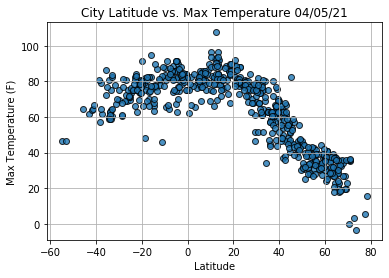

In [19]:
plt.scatter(lats,max_temps,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show
plt.show()

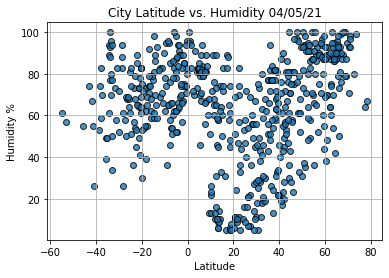

In [20]:
plt.scatter(lats,humidity,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show
plt.show()

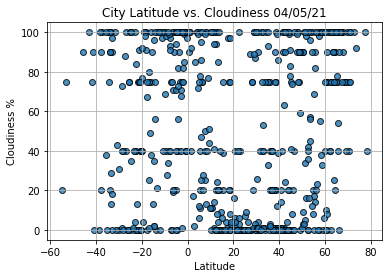

In [21]:
plt.scatter(lats,cloudiness,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show
plt.show()

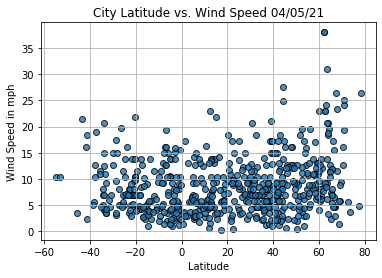

In [22]:
plt.scatter(lats,wind_speed,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed in mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show
plt.show()

In [23]:
from scipy.stats import linregress


def plot_linregress(x_vals,y_vals,title,y_label,position:(int,int)):
    # get linear regression params
    m,b,r,p,err = linregress(x_vals,y_vals)
    
    # Calculate the values to plot the line
    lin_vals = [m*x_val+b for x_val in x_vals]
    # String representation of the line
    line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    # plot the values and the line
    plt.scatter(x_vals,y_vals)
    plt.plot(x_vals,lin_vals,"r")
    # add other features to the chart
    plt.annotate(line_eq, position, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(f"{title}")
    plt.show()
    return m,b,r,p,err

In [24]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

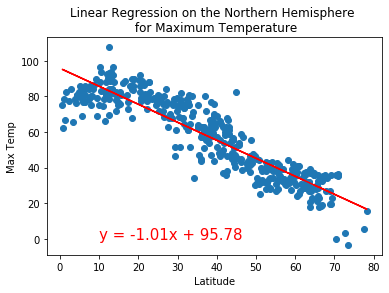

(-1.0116686190158155,
 95.7836353228397,
 -0.9051957401603227,
 2.221393229923741e-147,
 0.024021002336510663)

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linregress(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,0))

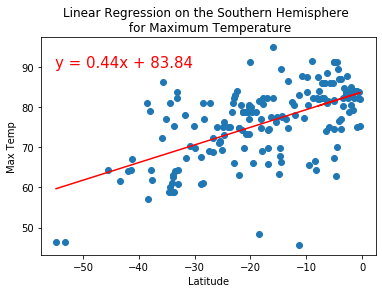

(0.4404977503563534,
 83.84184331217041,
 0.575631300706193,
 5.2439323945790445e-17,
 0.0473019713662731)

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

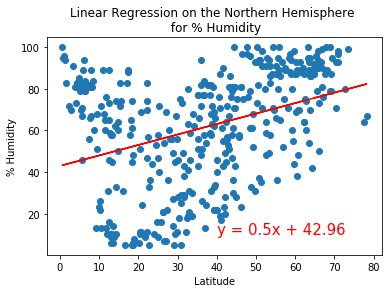

(0.5035172360485453,
 42.96437243076372,
 0.36505847720456647,
 7.812918221292892e-14,
 0.06493906298496979)

In [27]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

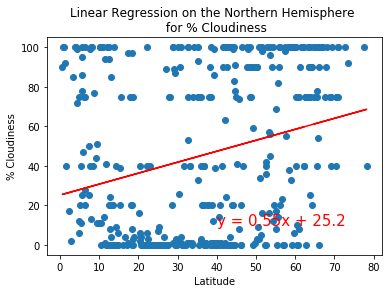

(0.5548976698444877,
 25.19676506845964,
 0.26758166348184187,
 7.195014599926845e-08,
 0.10104986821960421)

In [28]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

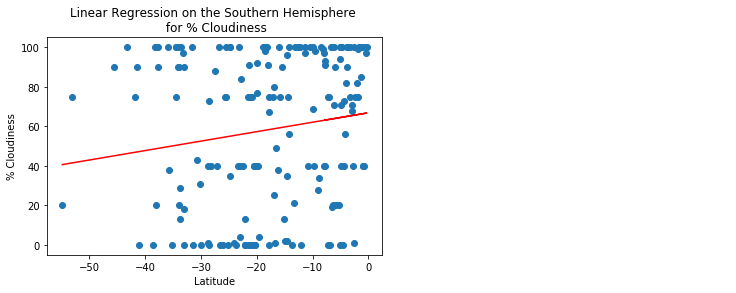

(0.4783734794213214,
 66.85393314771107,
 0.15263451694916802,
 0.04254165890106201,
 0.23414048246557295)

In [29]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

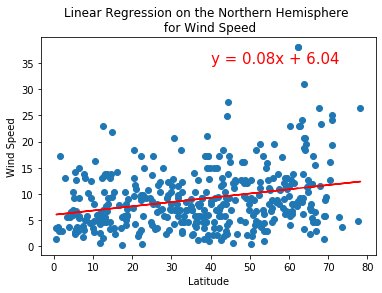

(0.08112870307549513,
 6.041143080818037,
 0.275813089661598,
 2.7202868806683037e-08,
 0.014298488933730062)

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

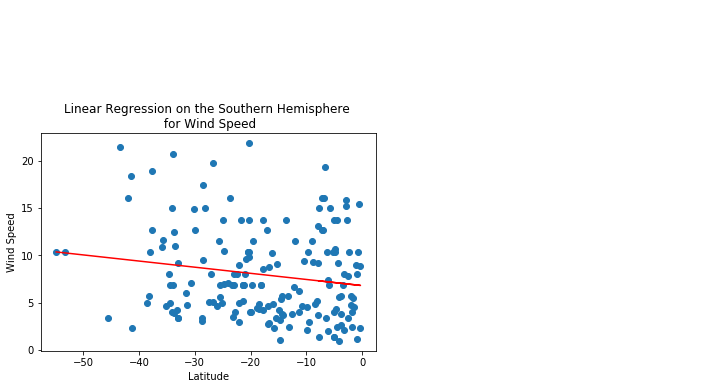

(-0.06496836538586633,
 6.812785422995008,
 -0.16884498135535544,
 0.024667189601722133,
 0.028669111466651565)

In [31]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))